# DMQC Report: WMO 4901786

## Current status and metadata: 

- DOVA float, inactive as of November 2018
- Completed 100 cycles in mid-North Pacific
- Calculated mean gain of 0.838

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import datestr2num
import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np
import pandas as pd
import bgcArgoDMQC as bgc

wmo = 4901786
flt = bgc.sprof(wmo)
flt.clean()
gains = flt.calc_gains(ref='WOA')
print(np.nanmean(gains))

# flt.plot('map') # not built yet

Extracting WOA data for Jan
Extracting WOA data for Feb
Extracting WOA data for Mar
Extracting WOA data for Apr
Extracting WOA data for May
Extracting WOA data for Jun
Extracting WOA data for Jul
Extracting WOA data for Aug
Extracting WOA data for Sep
Extracting WOA data for Oct
Extracting WOA data for Nov
Extracting WOA data for Dec

Calculating gains using WOA surface data and float O2 percent saturation...
0.837729247322046


## DOXY Audit Status

- Almost all points flagged - all raw DOXY values are quite high, mean around 120% saturation
- Mean raw DOXY gain of 0.838

In [3]:
audit_file = list(Path('../../audit/').glob('DOXY_WOA*'))[-1]
df = pd.read_csv(audit_file, sep='\t', header=25)
df = df.loc[df.WMO == wmo]
df['date'] = [datestr2num(t) for t in df['profile date']]
print(df['WOA G_raw'].mean())

0.837816091954023


## Visual QC

Check the profiles and any anomolous looking saturation values.


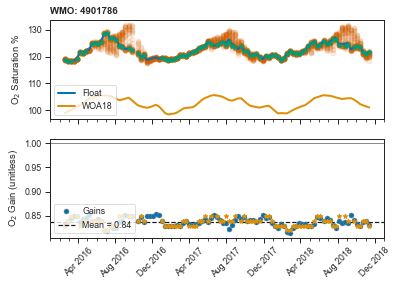

In [4]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)